# Data Science Recap

Example Coursera DataScience course: labs/DP0701EN/Webscraping postal codes of Canada-Part 1 2 and 3.ipynb

  * https://towardsdatascience.com/introduction-to-web-scraping-with-beautifulsoup-e87a06c2b857
  * https://towardsdatascience.com/in-10-minutes-web-scraping-with-beautiful-soup-and-selenium-for-data-professionals-8de169d36319

  * https://www.dataquest.io/blog/web-scraping-tutorial-python/ - Beginner
  * https://www.dataquest.io/blog/web-scraping-beautifulsoup/
  * https://www.datacamp.com/community/tutorials/web-scraping-python-nlp
  * https://towardsdatascience.com/web-scraping-craigslist-a-complete-tutorial-c41cea4f4981
  * https://www.datacamp.com/community/tutorials/web-scraping-using-python


## 2 Web Scraping with BeautifulSoup - IMDB and Metacritic
https://www.dataquest.io/blog/web-scraping-beautifulsoup/


  * **Requests**
  * **Beautiful Soup**
  * **Pandas**
  * **Matplotlib**

<img src = "IMDB.png" width = 500 align = 'left'>

<hr>

## Survey webpage data structure

https://www.imdb.com/search/title/?release_date=2017-01-01,2017-12-31&sort=num_votes,desc


<img src = "IMDB F12.png" width = 800 align = 'left'>

### IMDB 2017 releases - most voted

http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1

### Prepare python packages

In [4]:
pip install BeautifulSoup4 requests

     |████████████████████████████████| 102kB 1.9MB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Retrieve first page data

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.71 Safari/537.36'} #header spoofing
#headers = {"Accept-Language": "en-US, en;q=0.5"}

url = 'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'

#connect to website

try:
    from requests import get
    response = get(url, headers=headers)
    print("Connection to ", url, "succesfull")
    print(response.text[:500]) # only first 500 char (from:to) - slice
except:
    print("An error occured.")

Connection to  http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1 succesfull



<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
        
<script type='text/javascript'>var ue_t0=ue_t0||+new Date();</script>
<script type='text/javascript'>
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){


## Using BeautifulSoup to parse the HTML content

*parse out the div containers 'lister-item mode-advanced' (50) and 'lister-item-content'*

In [5]:
#parse page to BeautifulSoup using the internal HTML parser

from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)


bs4.BeautifulSoup

In [15]:
html_soup


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);


    var ue_err_chan = 'jserr';
(function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b||{};var c=f.logLevel||b.logLevel;c&&c!==k&&c!==m&&c!==n&&c!==p||a.ec++;c&&c!=k||a.ecf++;b.pageURL

In [6]:
# find_all movie containers 'lister-item moder-advanced'

movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


<hr>

### select and extract items of interest from the movie_containers

*lister-item-content*

  * The name of the movie.
  * The year of release.
  * The IMDB rating.
  * The Metascore.
  * The number of votes.

#### First movie - name of the movie
 *H3 class=lister-item-header a*

In [21]:
first_movie = movie_container[0] # investigate only first movie container

first_name = first_movie.h3.a.text
first_name

'Logan'

#### First movie - year of the movie
*Extract year from the second span within the H3 header tag - class = 'lister-item-year text-muted unbold'*

<img src = "IMDB F12 first_movie detail.png" width = 800 align = 'left'>

In [25]:
first_year = first_movie.h3.find('span', class_= 'lister-item-year text-muted unbold')
first_year.text

'(2017)'

#### First movie - IMDB rating
*Extract IMDB rating from the div - class = 'inline-block ratings-imdb-rating property data-value'* --> more easy jump to tag **strong**

<img src = "IMDB F12 first_movie rating detail.png" width = 800 align = 'left'>

In [27]:
first_IMDB_rating = first_movie.strong
float(first_IMDB_rating.text) # convert to float

8.1

#### First movie - Metascore rating
*Extract metascore rating from the span - class = 'metascore favorable'*

<img src = "IMDB F12 first_movie metascore detail.png" width = 800 align = 'left'>

In [33]:
first_metascore = int(first_movie.find('span', class_ = 'metascore favorable').text) # only 'metascore' is suficient?
first_metascore

77

#### First movie - number of votes
*Extract number of votes from the span with name='nv'*

<img src = "IMDB F12 first_movie votes detail.png" width = 800 align = 'left'>

In [55]:
#first_votes = first_movie.find('span', attrs = {'name':'nv'}) # okay tricky - use dictionary {} can not use find('span', name = 'nv') --> find() got multiple values for argument 'name'

first_votes = int(first_movie.find('span', attrs = {'name':'nv'})['data-value'])
first_votes

#print(first_votes)
#print(first_votes.text)
#first_votes['data-value']

576636

### Page of movies


#### check if movie has a metascore else drop the information

In [58]:
eighth_movie_mscore = movie_containers[22].find('div', class_ = 'ratings-metascore') #movie without a metascore will return a NoneType
type(eighth_movie_mscore)

NoneType

#### Putting things together - declaring lists to store results

In [1]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

In [8]:
# Extract data from individual movie container
for container in movie_containers:
# If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
# The name
        name = container.h3.a.text
        names.append(name)
# The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
# The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
# The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
# The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

In [9]:
import pandas as pd
test_df = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
movie        43 non-null object
year         43 non-null object
imdb         43 non-null float64
metascore    43 non-null int64
votes        43 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ KB
None


movie        year  imdb  \
0                                              Logan      (2017)   8.1   
1                                     Thor: Ragnarok      (2017)   7.9   
2                     Guardians of the Galaxy Vol. 2      (2017)   7.6   
3                                       Wonder Woman      (2017)   7.4   
4                                            Dunkirk      (2017)   7.9   
5            Star Wars: Episode VIII - The Last Jedi      (2017)   7.1   
6                             Spider-Man: Homecoming      (2017)   7.4   
7                                            Get Out  (I) (2017)   7.7   
8                                  Blade Runner 2049      (2017)   8.0   
9                                                 It  (I) (2017)   7.4   
10                                       Baby Driver      (2017)   7.6   
11         Three Billboards Outside Ebbing, Missouri      (2017)   8.2   
12                                    Justice League      (2017)   6.4   
13                                The Shape of Water      (2017)   7.3   
14                              John Wick: Chapter 2      (2017)   7.5   
15                                              Coco  (I) (2017)   8.4   
16                    Jumanji: Welcome to the Jungle      (2017)   6.9   
17                              Beauty and the Beast      (2017)   7.2   
18                                Kong: Skull Island      (2017)   6.6   
19                       Kingsman: The Golden Circle      (2017)   6.8   
20  Pirates of the Caribbean: Dead Men Tell No Tales      (2017)   6.6   
21                                   Alien: Covenant      (2017)   6.4   
22                    War for the Planet of the Apes      (2017)   7.4   
23                              The Greatest Showman      (2017)   7.6   
24                                              Life  (I) (2017)   6.6   
25                           The Fate of the Furious      (2017)   6.7   
26                                         Lady Bird      (2017)   7.4   
27                      Murder on the Orient Express      (2017)   6.5   
28                                Ghost in the Shell      (2017)   6.3   
29                                        Wind River      (2017)   7.7   
30                  King Arthur: Legend of the Sword      (2017)   6.8   
31                            The Hitman's Bodyguard      (2017)   6.9   
32                                           Mother!      (2017)   6.6   
33                              Call Me by Your Name      (2017)   7.9   
34                                         The Mummy      (2017)   5.5   
35                                     Atomic Blonde      (2017)   6.7   
36                                            Bright  (I) (2017)   6.4   
37                                          I, Tonya      (2017)   7.5   
38       Valerian and the City of a Thousand Planets      (2017)   6.5   
39                                          Baywatch      (2017)   5.5   
40                                      Darkest Hour      (2017)   7.4   
41                                     American Made      (2017)   7.1   
42                     Transformers: The Last Knight      (2017)   5.2   

    metascore   votes  
0          77  576642  
1          74  508269  
2          67  502994  
3          76  500365  
4          94  480266  
5          85  475217  
6          73  451695  
7          84  419658  
8          81  391277  
9          69  388683  
10         86  380122  
11         88  359014  
12         45  339355  
13         87  319893  
14         75  311975  
15         81  294602  
16         58  252392  
17         65  244986  
18         62  244838  
19         44  238517  
20         39  234669  
21         65  232042  
22         82  206812  
23         48  205746  
24         54  186865  
25         56  185862  
26         94  185232  
27         52  183205  
28         52  180807  
29         73  175261  
30         41  172889  
31         47  166139 

### Create the Script for multiple pages - bits and parts

In [10]:
# create lists to vary the page url. Changing the year and changing the page

pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]

### Controlling the crawl rate

In [12]:
from time import sleep
from random import randint

In [21]:
#set up a request monitor
from time import time
timestart_time = time()
requests = 0
for _ in range(5):
# A request would go here
    requests += 1
    sleep(randint(1,3))
    elapsed_time = time() - timestart_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))

Request: 1; Frequency: 0.9987598559070673 requests/s
Request: 2; Frequency: 0.6658538039301101 requests/s
Request: 3; Frequency: 0.7490834483487783 requests/s
Request: 4; Frequency: 0.6660815187209493 requests/s
Request: 5; Frequency: 0.624412385526366 requests/s
Request: 6; Frequency: 0.599414191552974 requests/s
Request: 7; Frequency: 0.6357270735102994 requests/s
Request: 8; Frequency: 0.6659863454510497 requests/s
Request: 9; Frequency: 0.5994683688856447 requests/s
Request: 10; Frequency: 0.5876387807208149 requests/s
Request: 11; Frequency: 0.5783177280506763 requests/s
Request: 12; Frequency: 0.5707368281898793 requests/s
Request: 13; Frequency: 0.5410203442720495 requests/s
Request: 14; Frequency: 0.5593329777571048 requests/s
Request: 15; Frequency: 0.5548962187758667 requests/s
Request: 16; Frequency: 0.570747866199467 requests/s
Request: 17; Frequency: 0.5659944631372635 requests/s
Request: 18; Frequency: 0.5448628498561525 requests/s
Request: 19; Frequency: 0.55821490256838

In [27]:
from IPython.core.display import clear_output
start_time = time()
requests = 0
for _ in range(5):
# A request would go here
    requests += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)
print('Crawl finished after', requests, 'requests')

Crawl finished after 5 requests


In [29]:
from warnings import warn
warn("Warning Simulation")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Warning Simulation
  


### Create the Script for multiple pages - puting it together

In [30]:
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')
            break

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Request:72; Frequency: 0.07502905583190689 requests/s


In [32]:
names

['Gladiator',
 'Memento',
 'Snatch',
 'Requiem for a Dream',
 'X-Men',
 'Cast Away',
 'American Psycho',
 'Unbreakable',
 'Meet the Parents',
 'Mission: Impossible II',
 'O Brother, Where Art Thou?',
 'Gone in Sixty Seconds',
 'Wo hu cang long',
 'The Patriot',
 'Almost Famous',
 'Scary Movie',
 'Pitch Black',
 'Final Destination',
 'Me, Myself & Irene',
 'The Beach',
 'Amores perros',
 'Traffic',
 'Remember the Titans',
 'How the Grinch Stole Christmas',
 'What Women Want',
 'Miss Congeniality',
 'Chocolat',
 'Chicken Run',
 "Charlie's Angels",
 "The Emperor's New Groove",
 'Erin Brockovich',
 'Batoru rowaiaru',
 'High Fidelity',
 'Road Trip',
 'The Perfect Storm',
 "Dude, Where's My Car?",
 'Billy Elliot',
 'Hollow Man',
 'Scream 3',
 'Shanghai Noon',
 'The 6th Day',
 'What Lies Beneath',
 'Faa yeung nin wa',
 'Pay It Forward',
 'The Whole Nine Yards',
 'Coyote Ugly',
 'Men of Honor',
 'The Family Man',
 'Frequency',
 'Gladiator',
 'Memento',
 'Snatch',
 'Requiem for a Dream',
 'X-Me

In [33]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 5 columns):
movie        3276 non-null object
year         3276 non-null object
imdb         3276 non-null float64
metascore    3276 non-null int64
votes        3276 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 128.1+ KB
None


movie    year  imdb  metascore    votes
0               Gladiator  (2000)   8.5         67  1232570
1                 Memento  (2000)   8.4         80  1044301
2                  Snatch  (2000)   8.3         55   728624
3     Requiem for a Dream  (2000)   8.3         68   710422
4                   X-Men  (2000)   7.4         64   543212
5               Cast Away  (2000)   7.8         73   479974
6         American Psycho  (2000)   7.6         64   439219
7             Unbreakable  (2000)   7.3         62   359940
8        Meet the Parents  (2000)   7.0         73   295494
9  Mission: Impossible II  (2000)   6.1         59   294761

In [34]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 5 columns):
movie        3276 non-null object
year         3276 non-null object
imdb         3276 non-null float64
metascore    3276 non-null int64
votes        3276 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 128.1+ KB


In [35]:
#movie_ratings.to_csv('movie_ratings.csv')

In [36]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings.head()

movie    year  imdb  metascore    votes
0            Gladiator  (2000)   8.5         67  1232570
1              Memento  (2000)   8.4         80  1044301
2               Snatch  (2000)   8.3         55   728624
3  Requiem for a Dream  (2000)   8.3         68   710422
4                X-Men  (2000)   7.4         64   543212

In [39]:
movie_ratings['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [38]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)
movie_ratings['year'].head(3)

0    2000
1    2000
2    2000
Name: year, dtype: int64

In [40]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

imdb  metascore
min   4.1       24.0
max   9.0      100.0

In [41]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

movie  year  imdb  metascore    votes  n_imdb
0  Gladiator  2000   8.5         67  1232570    85.0
1    Memento  2000   8.4         80  1044301    84.0
2     Snatch  2000   8.3         55   728624    83.0

In [42]:
movie_ratings.to_csv('movie_ratings.csv')

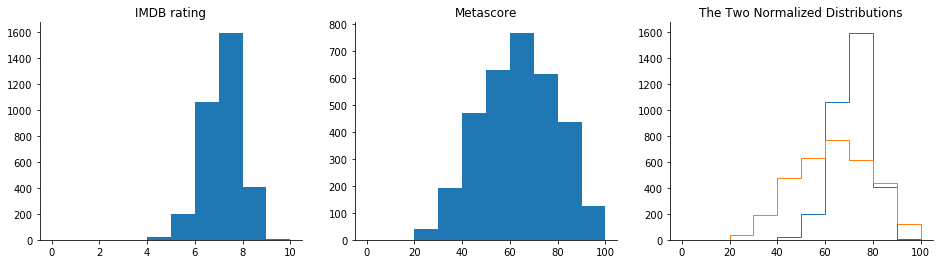

In [44]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')
ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')
ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
#ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()